# Contents

1. Importing relevant datasets.
2. PII data check.
3. Creating a regional segmentation for the dataset- look into differences in shopping habits of those regions.
4. Filtering out customers with less than 5 orders (low activity customers).
5. Creating customer profiles based on:
   - customer age
   - customer income
   - customer's number of dependants
   - customer's family status
   - customer's gender
   - orders in terms of weekday
   - orders in terms of daytime
   - orders in terms of departments of goods
6. Creating visualisations for the created profiles:
   - customer age
   - customer income
   - customer's number of dependants
   - customer's family status
   - customer's gender
   - orders in terms of weekday
   - orders in terms of daytime
   - orders in terms of departments of goods
7. Aggregating the max, mean, and min variables on the customer-profile level for usage frequency and expenditure.
   - customer age
   - customer income
   - customer's number of dependants
   - customer's family status
   - customer's gender
   - orders in terms of weekday
   - orders in terms of daytime
   - orders in terms of departments of goods
8. Comparing my customer profiles with regions and departments.
   - customer age
   - customer income
   - customer's number of dependants
   - customer's family status
   - customer's gender
   - orders in terms of weekday
   - orders in terms of daytime
   - orders in terms of departments of goods
9. Visualisations for the comparison of my customer profiles with regions and departments.

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Part I

# Importing Final Dataset

1. Import the data set you exported in Exercise 4.9 into a new Jupyter notebook. This should be the merged version of your data that contains the new customers column.

In [2]:
# Uploading my new dataset customers
final_dataset = pd.read_pickle(r'C:\Users\TemporaryAdmin\Desktop\yoana_learning\Data Analytics\Immension\tasks\my_tasks\part_4\02_data\prepared_data\final_dataset.pkl')

2. Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

One of the most important things for you to always be aware of is the type of data you’ve been allowed access to, namely, whether or not you’ve received personally identifiable information (PII). This type of data is covered extensively in the GDPR, a data privacy regulation in the European Union that governs the storage, usage, and sharing of data. If even a single column within your data set could potentially be traced back to a particular person, then you’re working with PII. Particularly sensitive are names, email addresses, physical addresses, and phone numbers.

In [3]:
final_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32641268 entries, 0 to 32641267
Data columns (total 40 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   Unnamed: 0_x            int64   
 1   Unnamed: 0.1            int64   
 2   order_id                int64   
 3   user_id                 object  
 4   eval_set                object  
 5   order_number            int64   
 6   orders_day_of_week      int64   
 7   order_hour_of_day       int64   
 8   days_since_prior_order  float64 
 9   first_order             bool    
 10  product_id              float64 
 11  add_to_cart_order       float64 
 12  reordered               float64 
 13  _merge                  category
 14  Unnamed: 0_y            float64 
 15  product_name            object  
 16  aisle_id                float64 
 17  department_id           float64 
 18  prices                  float64 
 19  exists                  category
 20  price_range_loc         object  
 21  busies

In [4]:
# Drop unnecessary columns
final_dataset_clean = final_dataset.drop(['Unnamed: 0_x', 'Unnamed: 0.1', 'Unnamed: 0_y'], axis = 1)

Looking into the dataset, the first_name column and the last_name column can be considered as a PII and might need to be dropped in order to compy with the GDPR regulations.

3. The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.

In [5]:
# Check an overview of the states in my dataset
final_dataset_clean.groupby('state').agg({'user_id': ['count']})

,user_id
,count
state,
Alabama,642694
Alaska,653070
Arizona,658597
Arkansas,640781
California,664472
Colorado,643864
Connecticut,627638
Delaware,641521


In [6]:
# Assign the states to regions
regions = []

for value in final_dataset["state"]:
  if value in ('Maine' , 'New Hampshire' , 'Vermont' , 'Massachusetts' , 'Rhode Island' , 'Connecticut' , 'New York' , 'Pennsylvania' , 'New Jersey') :
    regions.append('Region 1- Northeast')
  elif value in ('Wisconsin' , 'Michigan' , 'Illinois' , 'Indiana' , 'Ohio' , 'North Dakota' , 'South Dakota' , 'Nebraska' , 'Kansas' , 'Minnesota' , 'Iowa' , 'Missouri') :
    regions.append('Region 2- Midwest')
  elif value in ('Delaware' , 'Maryland' , 'District of Columbia' , 'Virginia' , 'West Virginia' , 'North Carolina' , 'South Carolina' , 'Georgia' , 'Florida', 'Kentucky' , 'Tennessee' , 'Mississippi' , 'Alabama' , 'Oklahoma' , 'Texas' , 'Arkansas' , 'Louisiana') :
    regions.append('Region 3- South')  
  elif value in ('Idaho' , 'Montana' , 'Wyoming' , 'Nevada' , 'Utah' , 'Colorado' , 'Arizona' , 'New Mexico' , 'Alaska' , 'Washington' , 'Oregon' , 'California' , 'Hawaii') :
    regions.append('Region 4- West')    
  else:
    regions.append('Unknown Region')

In [7]:
# Check the new column with the assigned values
regions

['Region 3- South',
 'Region 3- South',
 'Region 3- South',
 'Region 3- South',
 'Region 3- South',
 'Region 3- South',
 'Region 3- South',
 'Region 3- South',
 'Region 3- South',
 'Region 3- South',
 'Region 3- South',
 'Region 3- South',
 'Region 3- South',
 'Region 3- South',
 'Region 3- South',
 'Region 3- South',
 'Region 3- South',
 'Region 3- South',
 'Region 3- South',
 'Region 3- South',
 'Region 3- South',
 'Region 3- South',
 'Region 3- South',
 'Region 3- South',
 'Region 3- South',
 'Region 3- South',
 'Region 3- South',
 'Region 3- South',
 'Region 3- South',
 'Region 3- South',
 'Region 3- South',
 'Region 3- South',
 'Region 3- South',
 'Region 3- South',
 'Region 3- South',
 'Region 3- South',
 'Region 3- South',
 'Region 3- South',
 'Region 3- South',
 'Region 3- South',
 'Region 3- South',
 'Region 3- South',
 'Region 3- South',
 'Region 3- South',
 'Region 3- South',
 'Region 3- South',
 'Region 3- South',
 'Region 3- South',
 'Region 3- South',
 'Region 3- South',


In [8]:
# Assign a new column in the dataset = region column
final_dataset_clean['region'] = regions

In [9]:
# Check an overview of the values assigned
final_dataset_clean['region'].value_counts(dropna = False)

Region 3- South        10870719
Region 4- West          8353182
Region 2- Midwest       7652535
Region 1- Northeast     5764832
Name: region, dtype: int64

There are no values assigned in the 'Unknown Region' column which means I have all states assigned to a region in the list. 

In [10]:
# Checking the updated dataset
final_dataset_clean.head(50)

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,...,last_name,gender,state,age,date_joined,number_dependents,family_status,yearly_income,present,region
0,2539329,1,prior,1,2,8,NaN,True,196.0,1.0,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,Region 3- South
1,2539329,1,prior,1,2,8,NaN,True,14084.0,2.0,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,Region 3- South
2,2539329,1,prior,1,2,8,NaN,True,12427.0,3.0,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,Region 3- South
3,2539329,1,prior,1,2,8,NaN,True,26088.0,4.0,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,Region 3- South
4,2539329,1,prior,1,2,8,NaN,True,26405.0,5.0,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,Region 3- South
5,2398795,1,prior,2,3,7,15.0,False,196.0,1.0,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,Region 3- South
6,2398795,1,prior,2,3,7,15.0,False,10258.0,2.0,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,Region 3- South
7,2398795,1,prior,2,3,7,15.0,False,12427.0,3.0,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,Region 3- South
8,2398795,1,prior,2,3,7,15.0,False,13176.0,4.0,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,Region 3- South
9,2398795,1,prior,2,3,7,15.0,False,26088.0,5.0,...,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both,Region 3- South


Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

In [11]:
crosstab = pd.crosstab(final_dataset_clean['region'], final_dataset_clean['spent_flag'], dropna = False)

In [12]:
# Save the crosstab data in an excel file
crosstab.to_clipboard()

In [13]:
# Import the file where I saved the data
path= r'C:\Users\TemporaryAdmin\Desktop\yoana_learning\Data Analytics\Immension\tasks\my_tasks\part_4'
crosstab_overview = pd.read_csv(os.path.join(path, '02_data', 'prepared_data', 'crosstab.csv'), index_col = False)

In [14]:
crosstab_overview

,region,High Spender,Low spender,Total,% High Spender,% Low spender
0,Region 1- Northeast,109140,5655692,5764832,1.93%,98.11%
1,Region 2- Midwest,157347,7495188,7652535,2.10%,97.94%
2,Region 3- South,211679,10659040,10870719,1.99%,98.05%
3,Region 4- West,161834,8191348,8353182,1.98%,98.06%


We have very similar spending habits in all 4 regions both for low spenders and for high spenders. 

4. The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample.

In [15]:
# loc() on the dataset in order to determine the two groups of customers- high activity and low activity ones 
final_dataset_clean.loc[final_dataset_clean['max_order'] >= 5, 'customer_activity'] = 'High-activity customer'

In [16]:
final_dataset_clean.loc[final_dataset_clean['max_order'] < 5, 'customer_activity'] = 'Low-activity customer'

In [17]:
# Checking the assigned values
final_dataset_clean['customer_activity'].value_counts(dropna = False)

High-activity customer    31929979
Low-activity customer       711289
Name: customer_activity, dtype: int64

In [18]:
# 'Low-activity customer' dataset
low_activity_customers = final_dataset_clean[final_dataset_clean['customer_activity'] == 'Low-activity customer']

In [19]:
# Exporting the low activity customers sample
path= r'C:\Users\TemporaryAdmin\Desktop\yoana_learning\Data Analytics\Immension\tasks\my_tasks\part_4'
low_activity_customers.to_pickle(os.path.join(path, '02_data', 'prepared_data', 'low_activity_customers.pkl'))

In [20]:
# 'High-activity customer' dataset
final_dataset_clean_1 = final_dataset_clean[final_dataset_clean['customer_activity'] == 'High-activity customer']

In [21]:
# Checking the customer activity column of the 'High-activity customer' dataset to assure that only high activity customers are left.
final_dataset_clean_1['customer_activity'].value_counts(dropna = False)

High-activity customer    31929979
Name: customer_activity, dtype: int64

5. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_the_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. 

# Age

In [22]:
# Checking the values in the age column
final_dataset_clean_1['age'].value_counts().sort_index()

18    492997
19    511257
20    496283
21    505072
22    506080
       ...  
77    493995
78    486974
79    523784
80    507612
81    501958
Name: age, Length: 64, dtype: int64

There are no missing values in the age column. The minimum age is 18 and the maximum is 81. We can make different profiles.

In [23]:
# Assigning the values to age profiles divided in 10 years ranges
age_profile = []

for value in final_dataset_clean_1['age']:
    if value <= 20:
        age_profile.append('18-20')
    elif (value > 20) and (value <= 30):
        age_profile.append('21-30')
    elif (value > 30) and (value <= 40):
        age_profile.append('31-40')
    elif (value > 40) and (value <= 50):
        age_profile.append('41-50')
    elif (value > 50) and (value <= 60):
        age_profile.append('51-60')
    elif (value > 60) and (value <= 70):
        age_profile.append('61-70')
    elif (value > 70) and (value <= 80):
        age_profile.append('71-80')
    elif (value > 80) and (value <= 90):
        age_profile.append('80+')    
    else:
        age_profile.append('missing_information')

In [24]:
final_dataset_clean_1['age_profile'] = age_profile

<ipython-input-24-aaa5fcc69006>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_dataset_clean_1['age_profile'] = age_profile


In [25]:
# Checking the age profile values
final_dataset_clean_1['age_profile'].value_counts().sort_index()

18-20    1500537
21-30    5001697
31-40    4995500
41-50    5019211
51-60    4984866
61-70    4928259
71-80    4997951
80+       501958
Name: age_profile, dtype: int64

# Income

In [26]:
# Checking the values in the yearly_income column
final_dataset_clean_1['yearly_income'].value_counts().sort_index()

25903      21
25911      29
25937      40
25941      32
25955     393
         ... 
584097    827
590790     55
591089    177
592409    319
593901    641
Name: yearly_income, Length: 101939, dtype: int64

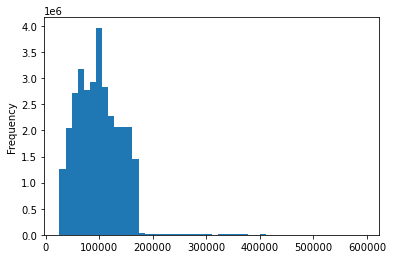

In [27]:
# Checking visually the income divisions through a  histograme 
hist_income= final_dataset_clean_1['yearly_income'].plot.hist(bins = 50)

Defining income profiles:
25 000-50 000
50 000-75 000
75 000-100 000
100 000-125 000
125 000-150 000
150 000+

In [28]:
income_profile = []

for value in final_dataset_clean_1['yearly_income']:
    if value <= 50000: 
        income_profile.append('025000-050000')
    elif (value > 50000) and (value <= 75000):
        income_profile.append('050000-075000')
    elif (value > 75000) and (value <= 100000):
        income_profile.append('075000-100000')
    elif (value > 100000) and (value <= 125000):
        income_profile.append('100000-125000')
    elif (value > 125000) and (value <= 150000):
        income_profile.append('125000-150000')
    elif (value > 150000):
        income_profile.append('150000+')
    else: 
        income_profile.append('missing_information')

In [29]:
final_dataset_clean_1['income_profile'] = income_profile

<ipython-input-29-16521dac5746>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_dataset_clean_1['income_profile'] = income_profile


In [30]:
# Checking the income profile values
final_dataset_clean_1['income_profile'].value_counts()

075000-100000    7051608
050000-075000    6748127
100000-125000    6102854
125000-150000    4516193
150000+          4000124
025000-050000    3511073
Name: income_profile, dtype: int64

# Number of dependants

In [31]:
final_dataset_clean_1['number_dependents'].value_counts().sort_index()

0    7979527
1    7961567
2    7974823
3    8014062
Name: number_dependents, dtype: int64

The groups seem small already, no need to divide further. We can just divide the customers by parents and non parents.

In [32]:
final_dataset_clean_1.loc[final_dataset_clean_1['number_dependents'] == 0, 'parental_status'] = 'not_a_parent'

C:\Users\TemporaryAdmin\anaconda3\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\TemporaryAdmin\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [33]:
final_dataset_clean_1.loc[final_dataset_clean_1['number_dependents'] >= 1, 'parental_status'] = 'parent'

C:\Users\TemporaryAdmin\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [34]:
# Checking the values count in the parental status groups
final_dataset_clean_1['parental_status'].value_counts(dropna = False)

parent          23950452
not_a_parent     7979527
Name: parental_status, dtype: int64

# Family status

In [35]:
final_dataset_clean_1['family_status'].value_counts().sort_index()

divorced/widowed                     2730548
living with parents and siblings     1528600
married                             22421852
single                               5248979
Name: family_status, dtype: int64

The groups seem small already, no need to divide further. 

# Gender

In [36]:
final_dataset_clean_1['gender'].value_counts().sort_index()

Female    15852377
Male      16077602
Name: gender, dtype: int64

No missing values recorded. 

# Orders days of week

In [37]:
final_dataset_clean_1['orders_day_of_week'].value_counts().sort_index()

0    6107725
1    5572954
2    4147880
3    3785966
4    3733707
5    4152834
6    4428913
Name: orders_day_of_week, dtype: int64

In [38]:
final_dataset_clean_1.loc[final_dataset_clean_1['orders_day_of_week'] == 0, 'weekday'] = 'saturday'

C:\Users\TemporaryAdmin\anaconda3\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\TemporaryAdmin\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [39]:
final_dataset_clean_1.loc[final_dataset_clean_1['orders_day_of_week'] == 1, 'weekday'] = 'sunday'

C:\Users\TemporaryAdmin\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [40]:
final_dataset_clean_1.loc[final_dataset_clean_1['orders_day_of_week'] == 2, 'weekday'] = 'monday'

C:\Users\TemporaryAdmin\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [42]:
final_dataset_clean_1.loc[final_dataset_clean_1['orders_day_of_week'] == 3, 'weekday'] = 'tuesday'

C:\Users\TemporaryAdmin\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [43]:
final_dataset_clean_1.loc[final_dataset_clean_1['orders_day_of_week'] == 4, 'weekday'] = 'wednesday'

C:\Users\TemporaryAdmin\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [44]:
final_dataset_clean_1.loc[final_dataset_clean_1['orders_day_of_week'] == 5, 'weekday'] = 'thursday'

C:\Users\TemporaryAdmin\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [45]:
final_dataset_clean_1.loc[final_dataset_clean_1['orders_day_of_week'] == 6, 'weekday'] = 'friday'

C:\Users\TemporaryAdmin\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [46]:
# Checking the weekdays column
final_dataset_clean_1['weekday'].value_counts().sort_index()

friday       4428913
monday       4147880
saturday     6107725
sunday       5572954
thursday     4152834
tuesday      3785966
wednesday    3733707
Name: weekday, dtype: int64

# Orders hour of day

In [47]:
final_dataset_clean_1['order_hour_of_day'].value_counts().sort_index()

0      214813
1      113751
2       68154
3       50530
4       52445
5       86914
6      288126
7      883423
8     1700666
9     2426087
10    2725478
11    2695829
12    2574901
13    2620711
14    2649190
15    2619705
16    2493907
17    2052430
18    1607146
19    1237579
20     961743
21     784844
22     625350
23     396257
Name: order_hour_of_day, dtype: int64

In [48]:
ordertime = []

for value in final_dataset_clean_1["order_hour_of_day"]:
  if value in (0,1,2,3,4,5):
    ordertime.append("night")
  elif value in (6,7,8,9,10,11) :
    ordertime.append("morning")
  elif value in (12,13,14,15,16,17) :
    ordertime.append("afternoon")
  elif value in (18,19,20,21,22,23) :
    ordertime.append("evening")    
  else:
   ordertime.append("unknown")

In [49]:
final_dataset_clean_1['ordertime'] = ordertime

<ipython-input-49-66cb3e8ac91c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_dataset_clean_1['ordertime'] = ordertime


In [50]:
# Orders divided by daytime
final_dataset_clean_1['ordertime'].value_counts().sort_index()

afternoon    15010844
evening       5612919
morning      10719609
night          586607
Name: ordertime, dtype: int64

# Departments

In [51]:
# Import dataset departments
path= r'C:\Users\TemporaryAdmin\Desktop\yoana_learning\Data Analytics\Immension\tasks\my_tasks\part_4'
departments = pd.read_csv(os.path.join(path, '02_data', 'original_data', 'departments.csv'), index_col = False)

In [52]:
departments.head()

,department_id,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,department,frozen,other,bakery,produce,alcohol,international,beverages,pets,dry goods pasta,...,meat seafood,pantry,breakfast,canned goods,dairy eggs,household,babies,snacks,deli,missing


In [53]:
departments.T

,0
department_id,department
1,frozen
2,other
3,bakery
4,produce
5,alcohol
6,international
7,beverages
8,pets
9,dry goods pasta


In [ ]:
# Adding the department group names to the final dataset
final_dataset_clean_1.loc[final_dataset_clean_1['department_id'] == 1, 'department_name'] = 'frozen'
final_dataset_clean_1.loc[final_dataset_clean_1['department_id'] == 2, 'department_name'] = 'other'
final_dataset_clean_1.loc[final_dataset_clean_1['department_id'] == 3, 'department_name'] = 'bakery'
final_dataset_clean_1.loc[final_dataset_clean_1['department_id'] == 4, 'department_name'] = 'produce'
final_dataset_clean_1.loc[final_dataset_clean_1['department_id'] == 5, 'department_name'] = 'alcohol'
final_dataset_clean_1.loc[final_dataset_clean_1['department_id'] == 6, 'department_name'] = 'international'
final_dataset_clean_1.loc[final_dataset_clean_1['department_id'] == 7, 'department_name'] = 'beverages'
final_dataset_clean_1.loc[final_dataset_clean_1['department_id'] == 8, 'department_name'] = 'pets'
final_dataset_clean_1.loc[final_dataset_clean_1['department_id'] == 9, 'department_name'] = 'dry goods pasta'
final_dataset_clean_1.loc[final_dataset_clean_1['department_id'] == 10, 'department_name'] = 'bulk'
final_dataset_clean_1.loc[final_dataset_clean_1['department_id'] == 11, 'department_name'] = 'personal care'
final_dataset_clean_1.loc[final_dataset_clean_1['department_id'] == 12, 'department_name'] = 'meat seafood'
final_dataset_clean_1.loc[final_dataset_clean_1['department_id'] == 13, 'department_name'] = 'pantry'
final_dataset_clean_1.loc[final_dataset_clean_1['department_id'] == 14, 'department_name'] = 'breakfast'
final_dataset_clean_1.loc[final_dataset_clean_1['department_id'] == 15, 'department_name'] = 'canned goods'
final_dataset_clean_1.loc[final_dataset_clean_1['department_id'] == 16, 'department_name'] = 'dairy eggs'
final_dataset_clean_1.loc[final_dataset_clean_1['department_id'] == 17, 'department_name'] = 'households'
final_dataset_clean_1.loc[final_dataset_clean_1['department_id'] == 18, 'department_name'] = 'babies'
final_dataset_clean_1.loc[final_dataset_clean_1['department_id'] == 19, 'department_name'] = 'snacks'
final_dataset_clean_1.loc[final_dataset_clean_1['department_id'] == 20, 'department_name'] = 'deli'
final_dataset_clean_1.loc[final_dataset_clean_1['department_id'] == 21, 'department_name'] = 'missing'

C:\Users\TemporaryAdmin\anaconda3\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\TemporaryAdmin\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\TemporaryAdmin\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

In [ ]:
# Checkign the count of the values assigned to each department
final_dataset_clean_1['department_name'].value_counts().sort_index()

In [213]:
# Checking the version of my dataset before moving on
final_dataset_clean_1.head(50)

,order_id,user_id,eval_set,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,first_order,product_id,add_to_cart_order,...,present,region,customer_activity,age_profile,income_profile,parental_status,weekday,daytime,ordertime,department_name
0,2539329,1,prior,1,2,8,NaN,True,196.0,1.0,...,both,Region 3- South,High-activity customer,31-40,25000-50000,parent,monday,NaN,morning,beverages
1,2539329,1,prior,1,2,8,NaN,True,14084.0,2.0,...,both,Region 3- South,High-activity customer,31-40,25000-50000,parent,monday,NaN,morning,dairy eggs
2,2539329,1,prior,1,2,8,NaN,True,12427.0,3.0,...,both,Region 3- South,High-activity customer,31-40,25000-50000,parent,monday,NaN,morning,snacks
3,2539329,1,prior,1,2,8,NaN,True,26088.0,4.0,...,both,Region 3- South,High-activity customer,31-40,25000-50000,parent,monday,NaN,morning,snacks
4,2539329,1,prior,1,2,8,NaN,True,26405.0,5.0,...,both,Region 3- South,High-activity customer,31-40,25000-50000,parent,monday,NaN,morning,households
5,2398795,1,prior,2,3,7,15.0,False,196.0,1.0,...,both,Region 3- South,High-activity customer,31-40,25000-50000,parent,tuesday,NaN,morning,beverages
6,2398795,1,prior,2,3,7,15.0,False,10258.0,2.0,...,both,Region 3- South,High-activity customer,31-40,25000-50000,parent,tuesday,NaN,morning,snacks
7,2398795,1,prior,2,3,7,15.0,False,12427.0,3.0,...,both,Region 3- South,High-activity customer,31-40,25000-50000,parent,tuesday,NaN,morning,snacks
8,2398795,1,prior,2,3,7,15.0,False,13176.0,4.0,...,both,Region 3- South,High-activity customer,31-40,25000-50000,parent,tuesday,NaN,morning,produce
9,2398795,1,prior,2,3,7,15.0,False,26088.0,5.0,...,both,Region 3- South,High-activity customer,31-40,25000-50000,parent,tuesday,NaN,morning,snacks


6. Create an appropriate visualization to show the distribution of profiles.

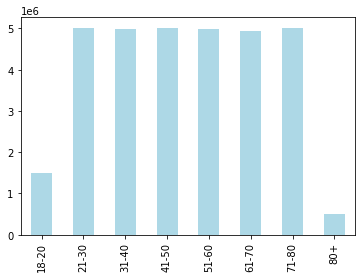

In [492]:
bar_age = final_dataset_clean_1['age_profile'].value_counts().sort_index().plot.bar(color= ['lightblue'])

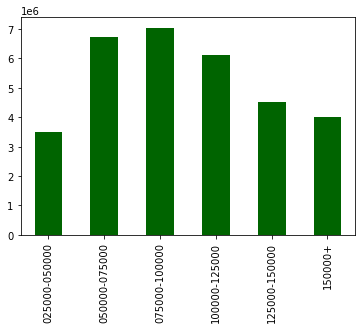

In [498]:
bar_income = final_dataset_clean_1['income_profile'].value_counts().sort_index().plot.bar(color= ['darkgreen'])

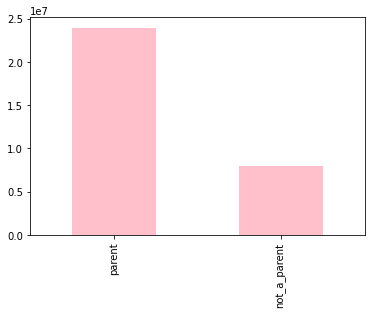

In [272]:
bar_parental_status = final_dataset_clean_1['parental_status'].value_counts().plot.bar(color= ['pink'])

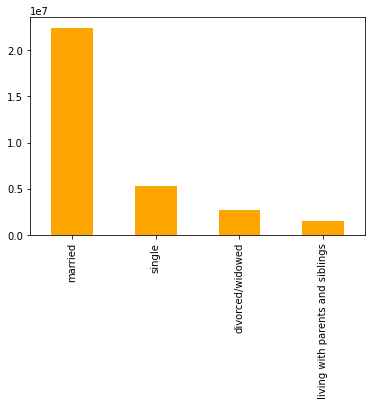

In [329]:
bar_family_status = final_dataset_clean_1['family_status'].value_counts().plot.bar(color= ['orange'])

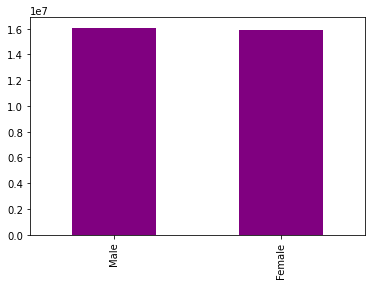

In [331]:
bar_gender = final_dataset_clean_1['gender'].value_counts().plot.bar(color= ['purple'])

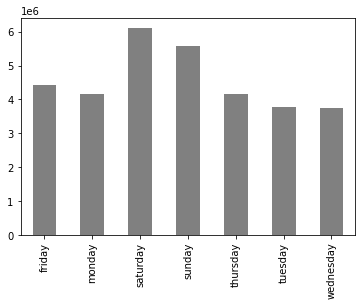

In [499]:
bar_weekday = final_dataset_clean_1['weekday'].value_counts().sort_index().plot.bar(color= ['grey'])

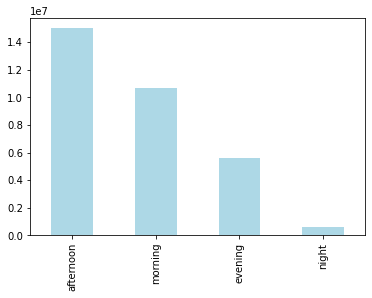

In [572]:
bar_ordertime = final_dataset_clean_1['ordertime'].value_counts().plot.bar(color= ['lightblue'])

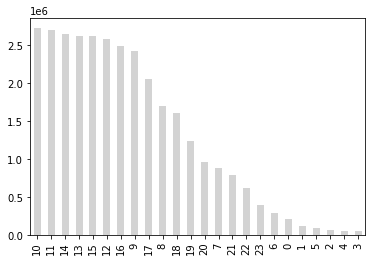

In [283]:
bar_hourly = final_dataset_clean_1['order_hour_of_day'].value_counts().plot.bar(color= ['lightgrey'])

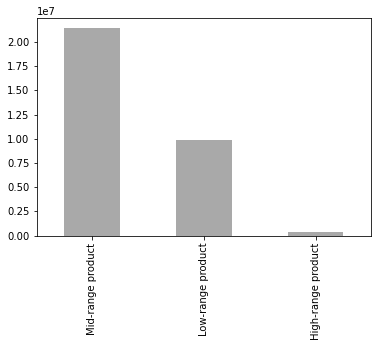

In [303]:
bar_price_range_category = final_dataset_clean_1['price_range_loc'].value_counts().plot.bar(color= ['darkgrey'])

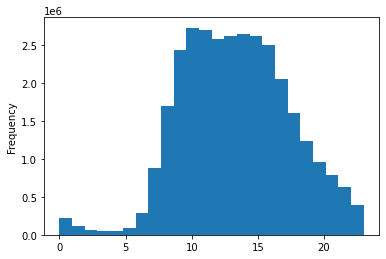

In [246]:
hist_hourly= final_dataset_clean_1['order_hour_of_day'].plot.hist(bins = 24)

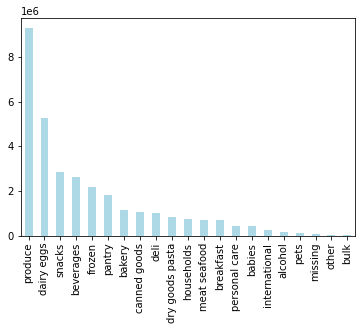

In [326]:
bar_department = final_dataset_clean_1['department_name'].value_counts().plot.bar(color= ['lightblue'])

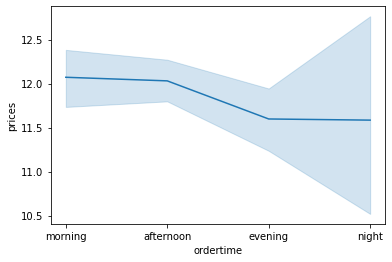

In [217]:
line_ordertime = sns.lineplot(data = final_dataset_clean_1, x = 'ordertime',y = 'prices')

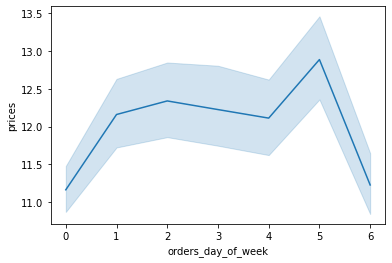

In [245]:
line_weekday = sns.lineplot(data = final_dataset_clean_1, x = 'orders_day_of_week',y = 'prices')

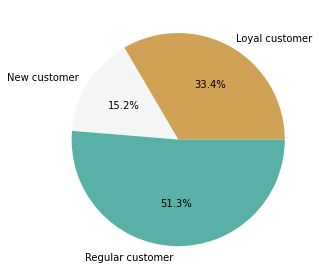

In [320]:
# Brand localty customer distribution 
loyalty_pie = final_dataset_clean_1['loyalty_flag'].value_counts().sort_index().plot.pie(autopct='%1.1f%%', colors = sns.color_palette('BrBG',3))
plt.ylabel('')
plt.tight_layout()

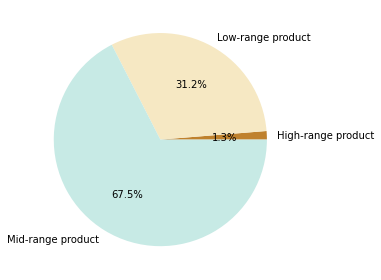

In [575]:
# Brand localty customer distribution 
price_range_pie = final_dataset_clean_1['price_range_loc'].value_counts().sort_index().plot.pie(autopct='%1.1f%%', colors = sns.color_palette('BrBG',4))
plt.ylabel('')
plt.tight_layout()

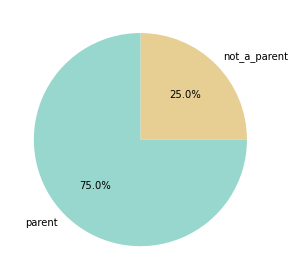

In [321]:
# Parental status customer distribution
parental_status_pie = final_dataset_clean_1['parental_status'].value_counts().sort_index().plot.pie(autopct='%1.1f%%', colors = sns.color_palette('BrBG',2))
plt.ylabel('')
plt.tight_layout()

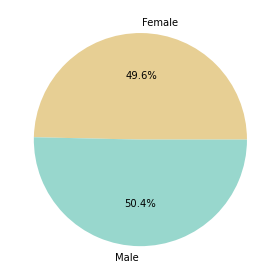

In [577]:
# Gender customer distribution
gender_pie = final_dataset_clean_1['gender'].value_counts().sort_index().plot.pie(autopct='%1.1f%%', colors = sns.color_palette('BrBG',2))
plt.ylabel('')
plt.tight_layout()

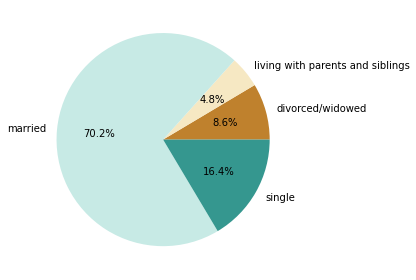

In [322]:
# Family status customer distribution
family_status_pie = final_dataset_clean_1['family_status'].value_counts().sort_index().plot.pie(autopct='%1.1f%%', colors = sns.color_palette('BrBG',4))
plt.ylabel('')
plt.tight_layout()

In [292]:
# Checking on the high spenders in the different regions
crosstab = pd.crosstab(final_dataset_clean_1['region'], final_dataset_clean['spent_flag'], dropna = False)

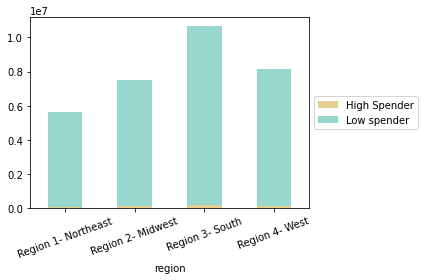

In [350]:
# Visualisation
bar_crosstab_region = crosstab.plot(kind = 'bar', stacked = True, color = sns.color_palette('BrBG', 2))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation= 20, horizontalalignment="center")
plt.tight_layout()

In [298]:
# Checking on the high spenders in the different order times of the day
crosstab_ordertime = pd.crosstab(final_dataset_clean_1['ordertime'], final_dataset_clean['spent_flag'], dropna = False)

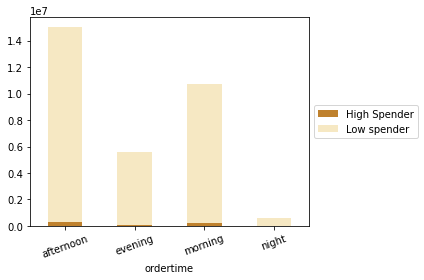

In [348]:
# Visualisation
bar_crosstab_ordertime = crosstab_ordertime.plot(kind = 'bar', stacked = True, color = sns.color_palette('BrBG', 4))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation= 20, horizontalalignment="center")
plt.tight_layout()

7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure.

# Age

In [220]:
# Expenditure aggregation for age profiles
expenditure_age_profile = final_dataset_clean_1.groupby('age_profile').agg({'prices': ['mean', 'min', 'max']})

In [221]:
expenditure_age_profile

prices              
                  mean  min      max
age_profile                         
18-20        10.551264  1.0  99999.0
21-30        12.546882  1.0  99999.0
31-40        12.115469  1.0  99999.0
41-50        11.940665  1.0  99999.0
51-60        11.899029  1.0  99999.0
61-70        11.875558  1.0  99999.0
71-80        11.986956  1.0  99999.0
80+          10.158986  1.0  99999.0

In [ ]:
expenditure_age.to_clipboard()

In [222]:
# Usage frequency aggregation for age profiles
usage_frequency_age_profile = final_dataset_clean_1.groupby('age_profile').agg({'days_since_prior_order': ['mean', 'min', 'max']})

In [223]:
usage_frequency_age_profile

days_since_prior_order           
                              mean  min   max
age_profile                                  
18-20                    11.066649  0.0  30.0
21-30                    11.022503  0.0  30.0
31-40                    10.974476  0.0  30.0
41-50                    10.993798  0.0  30.0
51-60                    11.042919  0.0  30.0
61-70                    10.975109  0.0  30.0
71-80                    10.990145  0.0  30.0
80+                      11.031474  0.0  30.0

In [ ]:
usage_frequency_age_profile.to_clipboard()

# Income

In [504]:
# Expenditure aggregation for yearly income
expenditure_income_profile = final_dataset_clean_1.groupby('income_profile').agg({'prices': ['mean', 'min', 'max']})

In [505]:
expenditure_income_profile

prices              
                     mean  min      max
income_profile                         
025000-050000    6.703349  1.0     25.0
050000-075000    7.834161  1.0  14900.0
075000-100000    9.032955  1.0  99999.0
100000-125000    9.917454  1.0  99999.0
125000-150000   11.137726  1.0  99999.0
150000+         32.722373  1.0  99999.0

In [ ]:
expenditure_income_profile.to_clipboard()

In [502]:
# Expenditure aggregation for yearly income
usage_frequency_income_profile = final_dataset_clean_1.groupby('income_profile').agg({'days_since_prior_order': ['mean', 'min', 'max']})

In [503]:
usage_frequency_income_profile

days_since_prior_order           
                                 mean  min   max
income_profile                                  
025000-050000               11.443349  0.0  30.0
050000-075000               10.957396  0.0  30.0
075000-100000               10.942814  0.0  30.0
100000-125000               10.972873  0.0  30.0
125000-150000               11.002651  0.0  30.0
150000+                     10.852657  0.0  30.0

In [ ]:
usage_frequency_yearly_income.to_clipboard()

# Number of dependants

In [233]:
# Expenditure aggregation for number of dependants
expenditure_parental_status = final_dataset_clean_1.groupby('parental_status').agg({'prices': ['mean', 'min', 'max']})

In [234]:
expenditure_parental_status

prices              
                      mean  min      max
parental_status                         
not_a_parent     12.089298  1.0  99999.0
parent           11.917431  1.0  99999.0

In [ ]:
expenditure_parental_status.to_clipboard()

In [235]:
# Expenditure aggregation for number of dependants
usage_frequency_parental_status = final_dataset_clean_1.groupby('parental_status').agg({'days_since_prior_order': ['mean', 'min', 'max']})

In [236]:
usage_frequency_parental_status

days_since_prior_order           
                                  mean  min   max
parental_status                                  
not_a_parent                 10.981897  0.0  30.0
parent                       11.010693  0.0  30.0

In [ ]:
usage_frequency_parental_status.to_clipboard()

# Family status

In [237]:
# Expenditure aggregation for family status
expenditure_family_status = final_dataset_clean_1.groupby('family_status').agg({'prices': ['mean', 'min', 'max']})

In [238]:
expenditure_family_status

prices              
                                       mean  min      max
family_status                                            
divorced/widowed                  11.489227  1.0  99999.0
living with parents and siblings  10.843853  1.0  99999.0
married                           11.990619  1.0  99999.0
single                            12.401473  1.0  99999.0

In [ ]:
expenditure_family_status.to_clipboard()

In [239]:
# Expenditure aggregation  for family status
usage_frequency_family_status = final_dataset_clean_1.groupby('family_status').agg({'days_since_prior_order': ['mean', 'min', 'max']})

In [240]:
usage_frequency_family_status

days_since_prior_order           
                                                   mean  min   max
family_status                                                     
divorced/widowed                              10.947537  0.0  30.0
living with parents and siblings              10.946789  0.0  30.0
married                                       11.015051  0.0  30.0
single                                        10.999772  0.0  30.0

In [ ]:
usage_frequency_family_status.to_clipboard()

# Gender

In [241]:
# Expenditure aggregation for gender
expenditure_gender = final_dataset_clean_1.groupby('gender').agg({'prices': ['mean', 'min', 'max']})

In [242]:
expenditure_gender

prices              
             mean  min      max
gender                         
Female  11.861048  1.0  99999.0
Male    12.058320  1.0  99999.0

In [ ]:
expenditure_gender.to_clipboard()

In [243]:
# Expenditure aggregation for gender
usage_frequency_gender = final_dataset_clean_1.groupby('gender').agg({'days_since_prior_order': ['mean', 'min', 'max']})

In [244]:
usage_frequency_gender

days_since_prior_order           
                         mean  min   max
gender                                  
Female              10.986205  0.0  30.0
Male                11.020547  0.0  30.0

In [ ]:
usage_frequency_gende.to_clipboard()

8. Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

# Age

In [314]:
# Age customer profile across regions
crosstab_age_profile = pd.crosstab(final_dataset_clean_1['age_profile'], final_dataset_clean_1['region'], dropna = False)

In [315]:
crosstab_age_profile

region,Region 1- Northeast,Region 2- Midwest,Region 3- South,Region 4- West
age_profile,,,,
18-20,261437,350874,509399,378827
21-30,883960,1156927,1684891,1275919
31-40,869970,1166461,1697346,1261723
41-50,880251,1211958,1643302,1283700
51-60,875252,1170700,1632470,1306444
61-70,886940,1159695,1632139,1249485
71-80,897257,1141465,1678807,1280422
80+,82143,128776,155943,135096


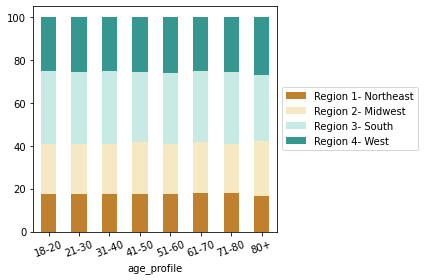

In [444]:
# Visualisation
bar_crosstab_age_profile = crosstab_age_profile.apply(lambda r: r/r.sum()*100, axis=1).plot(kind = 'bar', stacked = True, color = sns.color_palette('BrBG', 4))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation= 20, horizontalalignment="center")
plt.tight_layout()

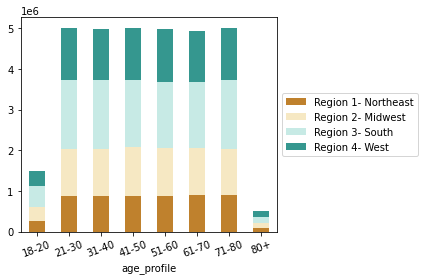

In [476]:
# Visualisation
bar_crosstab_age_profile_1 = crosstab_age_profile.plot(kind = 'bar', stacked = True, color = sns.color_palette('BrBG', 4))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation= 20, horizontalalignment="center")
plt.tight_layout()

# Income

In [506]:
# Income customer profile across regions
crosstab_income_profile = pd.crosstab(final_dataset_clean_1['income_profile'], final_dataset_clean_1['region'], dropna = False)

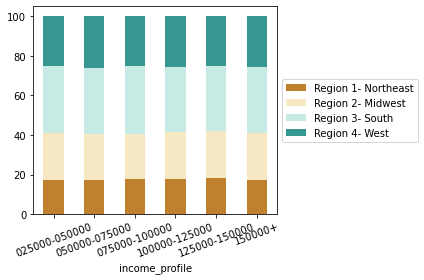

In [507]:
# Visualisation
bar_crosstab_income_profile = crosstab_income_profile.apply(lambda r: r/r.sum()*100, axis=1).plot(kind = 'bar', stacked = True, color = sns.color_palette('BrBG', 4))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation= 20, horizontalalignment="center")
plt.tight_layout()

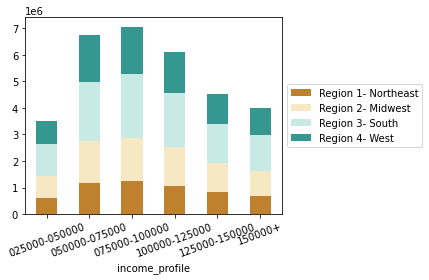

In [508]:
# Visualisation
bar_crosstab_income_profile_1 = crosstab_income_profile.plot(kind = 'bar', stacked = True, color = sns.color_palette('BrBG', 4))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation= 20, horizontalalignment="center")
plt.tight_layout()

In [509]:
# Regions across different income groups
crosstab_income_profile_1 = pd.crosstab(final_dataset_clean_1['region'], final_dataset_clean_1['income_profile'], dropna = False)

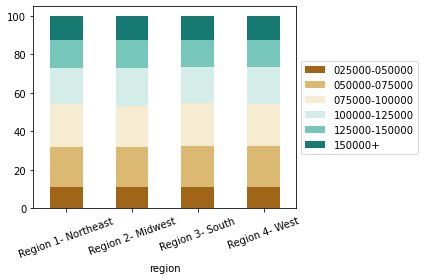

In [510]:
# Visualisation
bar_crosstab_income_profile_1 = crosstab_income_profile_1.apply(lambda r: r/r.sum()*100, axis=1).plot(kind = 'bar', stacked = True, color = sns.color_palette('BrBG', 6))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation= 20, horizontalalignment="center")
plt.tight_layout()

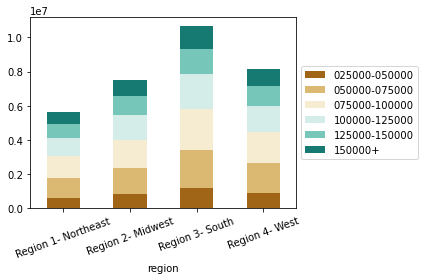

In [511]:
# Visualisation
bar_crosstab_income_profile_3 = crosstab_income_profile_1.plot(kind = 'bar', stacked = True, color = sns.color_palette('BrBG', 6))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation= 20, horizontalalignment="center")
plt.tight_layout()

# Parental status

In [351]:
# Parental status customer profile across regions
crosstab_parental_status = pd.crosstab(final_dataset_clean_1['region'], final_dataset_clean_1['parental_status'], dropna = False)

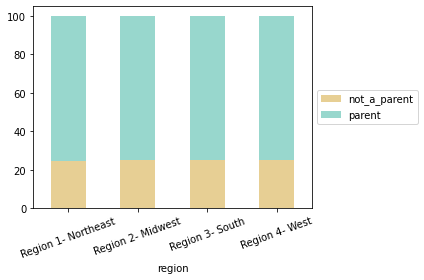

In [519]:
# Visualisation
bar_crosstab_crosstab_parental_status = crosstab_parental_status.apply(lambda r: r/r.sum()*100, axis=1).plot(kind = 'bar', stacked = True, color = sns.color_palette('BrBG', 2))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation= 20, horizontalalignment="center")
plt.tight_layout()

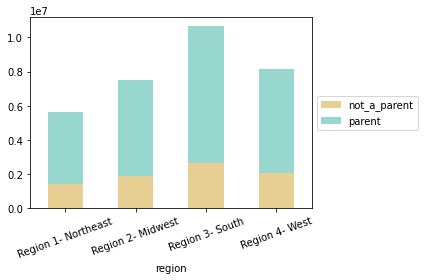

In [520]:
# Visualisation
bar_crosstab_crosstab_parental_status_1 = crosstab_parental_status.plot(kind = 'bar', stacked = True, color = sns.color_palette('BrBG', 2))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation= 20, horizontalalignment="center")
plt.tight_layout()

In [367]:
# Regions across parental status
crosstab_parental_status_1 = pd.crosstab(final_dataset_clean_1['parental_status'], final_dataset_clean_1['region'], dropna = False)

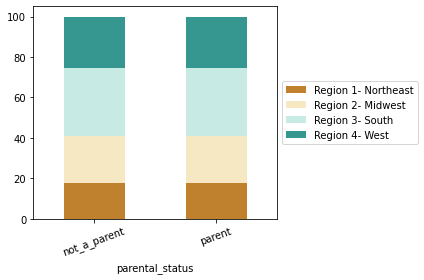

In [521]:
# Visualisation
bar_crosstab_crosstab_parental_status_1 = crosstab_parental_status_1.apply(lambda r: r/r.sum()*100, axis=1).plot(kind = 'bar', stacked = True, color = sns.color_palette('BrBG', 4))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation= 20, horizontalalignment="center")
plt.tight_layout()

# Family status

In [353]:
# Family status customer profile across regions
crosstab_family_status = pd.crosstab(final_dataset_clean_1['region'], final_dataset_clean_1['family_status'], dropna = False)

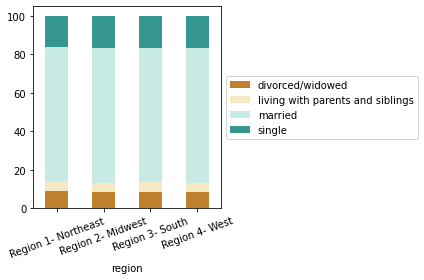

In [522]:
# Visualisation
bar_crosstab_family_status = crosstab_family_status.apply(lambda r: r/r.sum()*100, axis=1).plot(kind = 'bar', stacked = True, color = sns.color_palette('BrBG', 4))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation= 20, horizontalalignment="center")
plt.tight_layout()

In [355]:
# Regions across parental status
crosstab_family_status_1 = pd.crosstab(final_dataset_clean_1['family_status'], final_dataset_clean_1['region'], dropna = False)

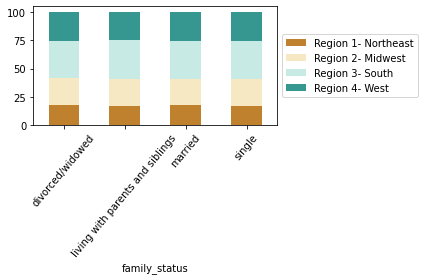

In [523]:
# Visualisation
bar_crosstab_family_status_1 = crosstab_family_status_1.apply(lambda r: r/r.sum()*100, axis=1).plot(kind = 'bar', stacked = True, color = sns.color_palette('BrBG',4))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation= 50, horizontalalignment="center")
plt.tight_layout()

# Gender

In [364]:
# Regions across gender
crosstab_gender = pd.crosstab(final_dataset_clean_1['gender'], final_dataset_clean_1['region'], dropna = False)

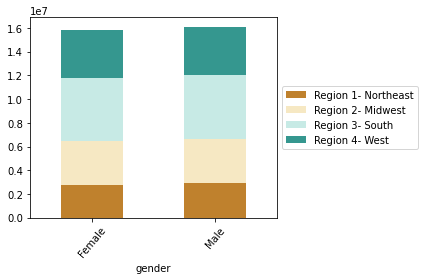

In [524]:
# Visualisation
bar_crosstab_gender = crosstab_gender.plot(kind = 'bar', stacked = True, color = sns.color_palette('BrBG', 4))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation= 50, horizontalalignment="center")
plt.tight_layout()

# Department

In [374]:
# Departments across gender
crosstab_gender_departments = pd.crosstab(final_dataset_clean_1['department_name'], final_dataset_clean_1['gender'], dropna = False)

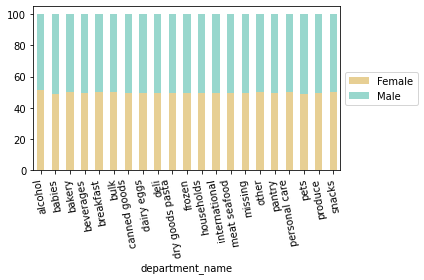

In [525]:
# Visualisation
bar_crosstab_gender_departments = crosstab_gender_departments.apply(lambda r: r/r.sum()*100, axis=1).plot(kind = 'bar', stacked = True, color = sns.color_palette('BrBG', 2))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation= 100, horizontalalignment="center")
plt.tight_layout()

In [379]:
# Departments across gender
crosstab_gender_departments_1 = pd.crosstab(final_dataset_clean_1['gender'], final_dataset_clean_1['department_name'], dropna = False)

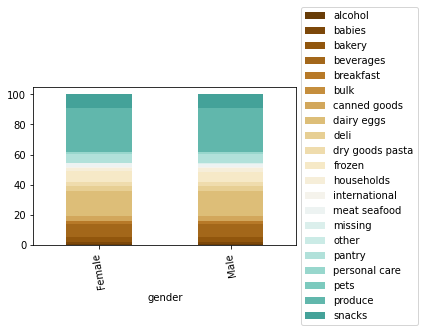

In [452]:
# Visualisation
bar_crosstab_gender_departments_1 = crosstab_gender_departments_1.apply(lambda r: r/r.sum()*100, axis=1).plot(kind = 'bar', stacked = True, color = sns.color_palette('BrBG', 26))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation= 100, horizontalalignment="center")
plt.tight_layout()

In [428]:
# Departments across parental status
crosstab_gender_departments_2 = pd.crosstab(final_dataset_clean_1['department_name'], final_dataset_clean_1['parental_status'], dropna = False)

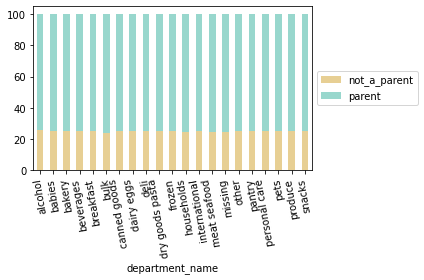

In [453]:
# Visualisation
bar_crosstab_gender_departments_2 = crosstab_gender_departments_2.apply(lambda r: r/r.sum()*100, axis=1).plot(kind = 'bar', stacked = True, color = sns.color_palette('BrBG', 2))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xticks(rotation= 100, horizontalalignment="center")
plt.tight_layout()

In [426]:
# Departments across region
crosstab_region_department= pd.crosstab(final_dataset_clean_1['department_name'], final_dataset_clean_1['region'], dropna = False)

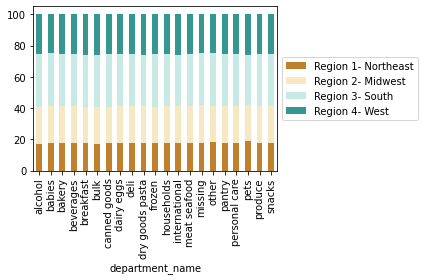

In [454]:
# Visualisation
bar_crosstab_region_department = crosstab_region_department.apply(lambda r: r/r.sum()*100, axis=1).plot(kind = 'bar', stacked = True, color = sns.color_palette('BrBG', 4 ))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

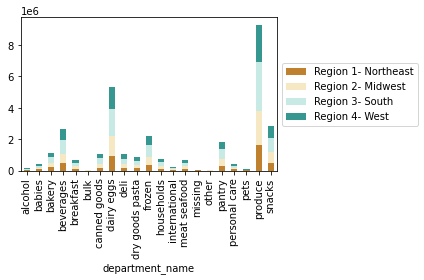

In [552]:
# Visualisation
bar_crosstab_region_department_1 = crosstab_region_department.plot(kind = 'bar', stacked = True, color = sns.color_palette('BrBG', 4 ))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

In [512]:
# Departments across income groups
crosstab_income_departments = pd.crosstab(final_dataset_clean_1['department_name'], final_dataset_clean_1['income_profile'], dropna = False)

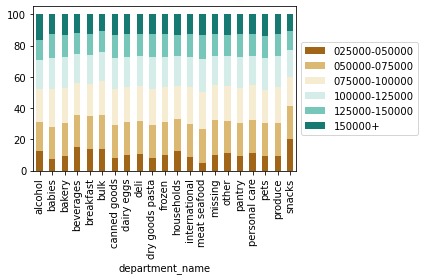

In [513]:
# Visualisation
bar_crosstab_income_departments = crosstab_income_departments.apply(lambda r: r/r.sum()*100, axis=1).plot(kind = 'bar', stacked = True, color = sns.color_palette('BrBG', 6 ))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

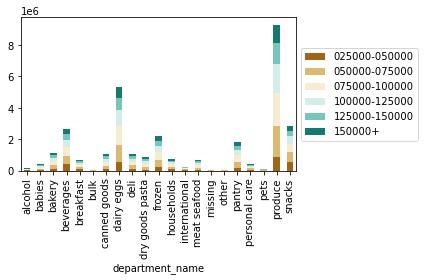

In [517]:
# Visualisation
bar_crosstab_income_departments_1 = crosstab_income_departments.plot(kind = 'bar', stacked = True, color = sns.color_palette('BrBG', 6 ))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

In [564]:
# Departments across family status groups
crosstab_familystatus_departments = pd.crosstab(final_dataset_clean_1['department_name'], final_dataset_clean_1['family_status'], dropna = False)

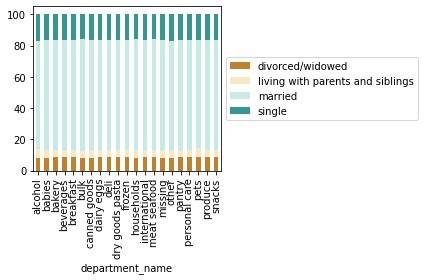

In [568]:
# Visualisation
bar_crosstab_familystatus_departments = crosstab_familystatus_departments.apply(lambda r: r/r.sum()*100, axis=1).plot(kind = 'bar', stacked = True, color = sns.color_palette('BrBG', 4 ))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

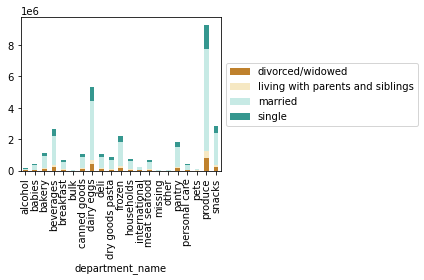

In [567]:
# Visualisation
bar_crosstab_familystatus_departments_1 = crosstab_familystatus_departments.plot(kind = 'bar', stacked = True, color = sns.color_palette('BrBG', 4 ))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

In [569]:
# Departments across parental status groups
crosstab_parentalstatus_departments = pd.crosstab(final_dataset_clean_1['department_name'], final_dataset_clean_1['parental_status'], dropna = False)

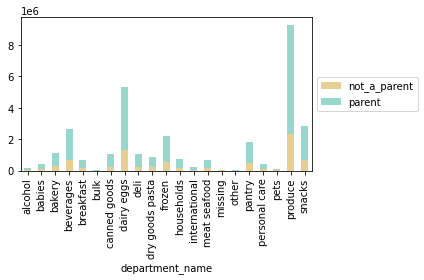

In [570]:
# Visualisation
bar_crosstab_parentalstatus_departments = crosstab_parentalstatus_departments.plot(kind = 'bar', stacked = True, color = sns.color_palette('BrBG', 2 ))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

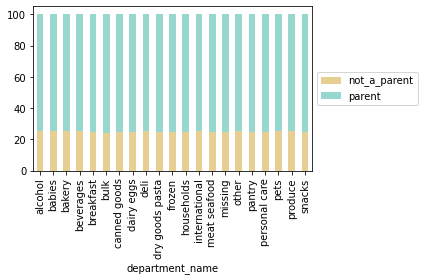

In [571]:
# Visualisation
bar_crosstab_parentalstatus_departments_1 = crosstab_parentalstatus_departments.apply(lambda r: r/r.sum()*100, axis=1).plot(kind = 'bar', stacked = True, color = sns.color_palette('BrBG', 2 ))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

In [548]:
# Departments across loyality status groups
crosstab_loyality_departments = pd.crosstab(final_dataset_clean_1['department_name'], final_dataset_clean_1['loyalty_flag'], dropna = False)

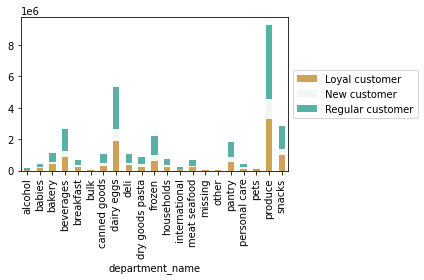

In [550]:
# Visualisation
bar_crosstab_loyality_departments = crosstab_loyality_departments.plot(kind = 'bar', stacked = True, color = sns.color_palette('BrBG', 3 ))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

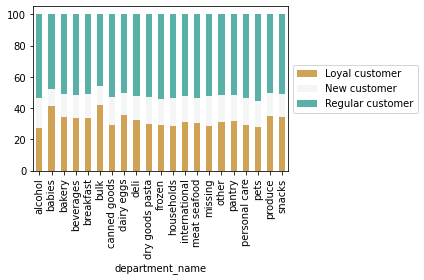

In [551]:
# Visualisation
bar_crosstab_loyality_departments_1 = crosstab_loyality_departments.apply(lambda r: r/r.sum()*100, axis=1).plot(kind = 'bar', stacked = True, color = sns.color_palette('BrBG', 3 ))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

In [558]:
# Departments across age and ordering habbits
crosstab_age_departments = pd.crosstab(final_dataset_clean_1['department_name'], final_dataset_clean_1['age_profile'], dropna = False)

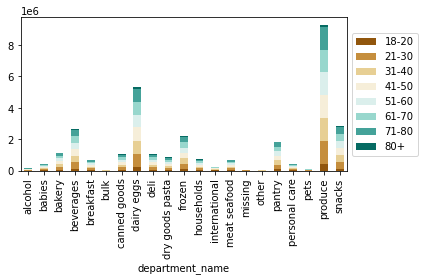

In [561]:
# Visualisation
bar_crosstab_age_departments= crosstab_age_departments.plot(kind = 'bar', stacked = True, color = sns.color_palette('BrBG', 8 ))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

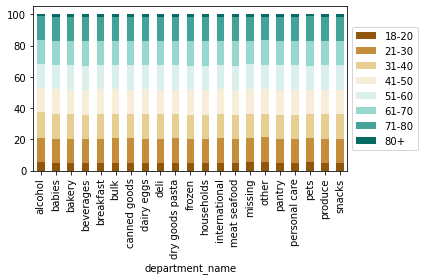

In [562]:
# Visualisation
bar_crosstab_age_departments_1= crosstab_age_departments.apply(lambda r: r/r.sum()*100, axis=1).plot(kind = 'bar', stacked = True, color = sns.color_palette('BrBG', 8 ))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

In [440]:
# Ages across ordertimes
crosstab_ordertime = pd.crosstab(final_dataset_clean_1['age_profile'], final_dataset_clean_1['ordertime'], dropna = False)

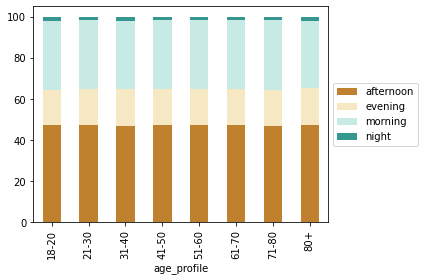

In [457]:
# Visualisation
bar_crosstab_ordertime= crosstab_ordertime.apply(lambda r: r/r.sum()*100, axis=1).plot(kind = 'bar', stacked = True, color = sns.color_palette('BrBG', 4 ))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

In [459]:
# Ages across weekdays
crosstab_weekday = pd.crosstab(final_dataset_clean_1['age_profile'], final_dataset_clean_1['weekday'], dropna = False)

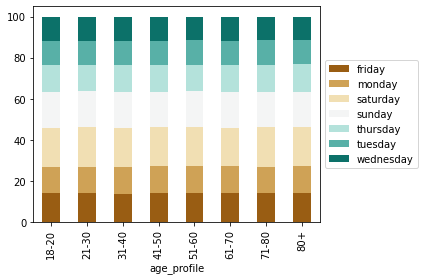

In [461]:
# Visualisation
bar_crosstab_weekday= crosstab_weekday.apply(lambda r: r/r.sum()*100, axis=1).plot(kind = 'bar', stacked = True, color = sns.color_palette('BrBG', 7 ))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

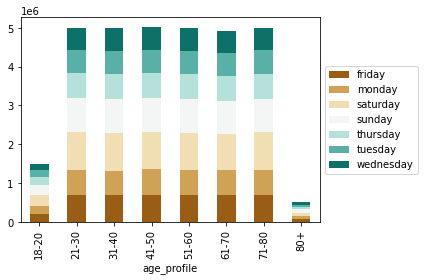

In [563]:
# Visualisation
bar_crosstab_weekday_1= crosstab_weekday.plot(kind = 'bar', stacked = True, color = sns.color_palette('BrBG', 7 ))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

In [464]:
# Price ranges across ordertime
crosstab_ordertime_pricerange = pd.crosstab(final_dataset_clean_1['price_range_loc'], final_dataset_clean_1['ordertime'], dropna = False)

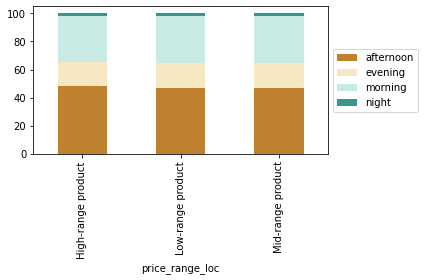

In [466]:
# Visualisation
bar_crosstab_ordertime_pricerange= crosstab_ordertime_pricerange.apply(lambda r: r/r.sum()*100, axis=1).plot(kind = 'bar', stacked = True, color = sns.color_palette('BrBG', 4 ))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

In [545]:
# Price ranges across ordertime 
crosstab_product_salary = pd.crosstab(final_dataset_clean_1['income_profile'], final_dataset_clean_1['price_range_loc'], dropna = False)

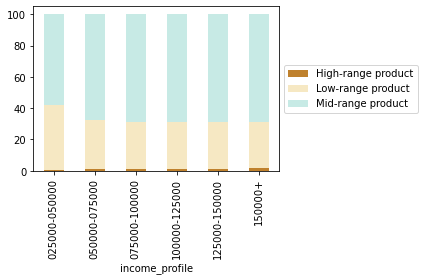

In [546]:
# Visualisation
bar_crosstab_product_salary= crosstab_product_salary.apply(lambda r: r/r.sum()*100, axis=1).plot(kind = 'bar', stacked = True, color = sns.color_palette('BrBG', 4 ))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

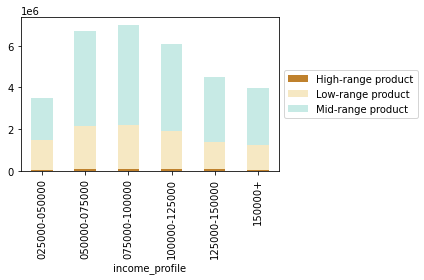

In [576]:
# Visualisation
bar_crosstab_product_salary_1= crosstab_product_salary.plot(kind = 'bar', stacked = True, color = sns.color_palette('BrBG', 4 ))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

In [472]:
# Average price per hour
prices_hours = final_dataset_clean_1.groupby('order_hour_of_day').agg({'prices': ['mean', 'min', 'max']})

In [473]:
prices_hours

prices              
                        mean  min      max
order_hour_of_day                         
0                  10.493615  1.0  99999.0
1                   9.915415  1.0  14900.0
2                  14.655575  1.0  99999.0
3                  13.083507  1.0  99999.0
4                  12.329211  1.0  99999.0
5                  12.739933  1.0  99999.0
6                  11.839860  1.0  99999.0
7                  12.352578  1.0  99999.0
8                  12.410532  1.0  99999.0
9                  11.739673  1.0  99999.0
10                 11.933215  1.0  99999.0
11                 12.229984  1.0  99999.0
12                 11.974805  1.0  99999.0
13                 11.463141  1.0  99999.0
14                 11.769707  1.0  99999.0
15                 12.066634  1.0  99999.0
16                 12.476086  1.0  99999.0
17                 12.577516  1.0  99999.0
18                 11.904645  1.0  99999.0
19                 12.506980  1.0  99999.0
20                 11.668765  1.0  99999.0
21                 11.139330  1.0  99999.0
22                 10.059985  1.0  99999.0
23                 10.682797  1.0  99999.0

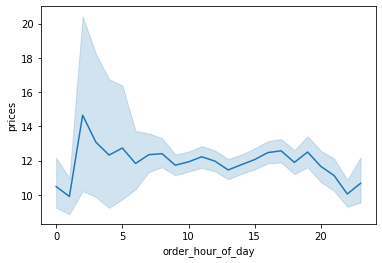

In [475]:
line_ordertime_price = sns.lineplot(data = final_dataset_clean_1, x = 'order_hour_of_day',y = 'prices')

In [470]:
# Price ranges across loyalty flag
crosstab_loyalty_flag = pd.crosstab(final_dataset_clean_1['price_range_loc'], final_dataset_clean_1['loyalty_flag'], dropna = False)

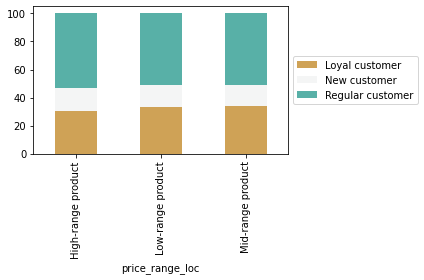

In [471]:
# Visualisation
bar_crosstab_loyalty_flag= crosstab_loyalty_flag.apply(lambda r: r/r.sum()*100, axis=1).plot(kind = 'bar', stacked = True, color = sns.color_palette('BrBG', 3 ))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()

So far- I was not able to spot any significant differences across regions. 

In [ ]:
bar_crosstab_age_department.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_crosstab_age_department.png'))

9. Produce suitable charts to illustrate your results and export them in your project folder.

In [526]:
# Exporting all of my visualisations
hist_income.figure.savefig(os.path.join(path, '04_analysis', 'visualisations', 'hist_income.png'))
bar_age.figure.savefig(os.path.join(path, '04_analysis', 'visualisations', 'bar_age.png'))
bar_income .figure.savefig(os.path.join(path, '04_analysis', 'visualisations', 'bar_income.png'))
bar_parental_status.figure.savefig(os.path.join(path, '04_analysis', 'visualisations', 'bar_parental_status.png'))
bar_family_status.figure.savefig(os.path.join(path, '04_analysis', 'visualisations', 'bar_family_status.png'))
bar_gender.figure.savefig(os.path.join(path, '04_analysis', 'visualisations', 'bar_gender.png'))
bar_weekday.figure.savefig(os.path.join(path, '04_analysis', 'visualisations', 'bar_weekday.png'))
bar_ordertime.figure.savefig(os.path.join(path, '04_analysis', 'visualisations', 'bar_ordertime.png'))
bar_hourly.figure.savefig(os.path.join(path, '04_analysis', 'visualisations', 'bar_hourly.png'))
bar_price_range_category.figure.savefig(os.path.join(path, '04_analysis', 'visualisations', 'bar_price_range_category.png'))
hist_hourly.figure.savefig(os.path.join(path, '04_analysis', 'visualisations', 'hist_hourly.png'))
bar_department.figure.savefig(os.path.join(path, '04_analysis', 'visualisations', 'bar_department.png'))
line_ordertime.figure.savefig(os.path.join(path, '04_analysis', 'visualisations', 'line_ordertime.png'))
line_weekday.figure.savefig(os.path.join(path, '04_analysis', 'visualisations', 'line_weekday.png'))
loyalty_pie.figure.savefig(os.path.join(path, '04_analysis', 'visualisations', 'loyalty_pie.png'))
parental_status_pie.figure.savefig(os.path.join(path, '04_analysis', 'visualisations', 'parental_status_pie.png'))
family_status_pie.figure.savefig(os.path.join(path, '04_analysis', 'visualisations', 'family_status_pie.png'))
bar_crosstab_region.figure.savefig(os.path.join(path, '04_analysis', 'visualisations', 'bar_crosstab_region.png'))
bar_crosstab_ordertime.figure.savefig(os.path.join(path, '04_analysis', 'visualisations', 'bar_crosstab_ordertime.png'))
bar_crosstab_age_profile.figure.savefig(os.path.join(path, '04_analysis', 'visualisations', 'bar_crosstab_age_profile.png'))
bar_crosstab_income_profile.figure.savefig(os.path.join(path, '04_analysis', 'visualisations', 'bar_crosstab_income_profile.png'))
bar_crosstab_income_profile_1.figure.savefig(os.path.join(path, '04_analysis', 'visualisations', 'bar_crosstab_income_profile_1.png'))
bar_crosstab_crosstab_parental_status.figure.savefig(os.path.join(path, '04_analysis', 'visualisations', 'bar_crosstab_crosstab_parental_status.png'))
bar_crosstab_gender.figure.savefig(os.path.join(path, '04_analysis', 'visualisations', 'bar_crosstab_gender.png'))
bar_crosstab_gender_departments.figure.savefig(os.path.join(path, '04_analysis', 'visualisations', 'bar_crosstab_gender_departments.png'))
bar_crosstab_gender_departments_1.figure.savefig(os.path.join(path, '04_analysis', 'visualisations', 'bar_crosstab_gender_departments_1.png'))
bar_crosstab_gender_departments_2.figure.savefig(os.path.join(path, '04_analysis', 'visualisations', 'bar_crosstab_gender_departments_2.png'))
bar_crosstab_region_department.figure.savefig(os.path.join(path, '04_analysis', 'visualisations', 'bar_crosstab_region_department.png'))
bar_crosstab_income_departments.figure.savefig(os.path.join(path, '04_analysis', 'visualisations', 'bar_crosstab_income_departments.png'))
bar_crosstab_ordertime.figure.savefig(os.path.join(path, '04_analysis', 'visualisations', 'bar_crosstab_ordertime.png'))
bar_crosstab_weekday.figure.savefig(os.path.join(path, '04_analysis', 'visualisations', 'bar_crosstab_weekday.png'))
bar_crosstab_ordertime_pricerange.figure.savefig(os.path.join(path, '04_analysis', 'visualisations', 'bar_crosstab_ordertime_pricerange.png'))
bar_crosstab_loyalty_flag.figure.savefig(os.path.join(path, '04_analysis', 'visualisations', 'bar_crosstab_loyalty_flag.png'))
bar_crosstab_age_profile_1.figure.savefig(os.path.join(path, '04_analysis', 'visualisations', 'bar_crosstab_age_profile_1.png'))
bar_crosstab_crosstab_parental_status_1.figure.savefig(os.path.join(path, '04_analysis', 'visualisations', 'bar_crosstab_crosstab_parental_status_1.png'))
bar_crosstab_income_departments_1.figure.savefig(os.path.join(path, '04_analysis', 'visualisations', 'bar_crosstab_income_departments_1.png'))
line_ordertime_price.figure.savefig(os.path.join(path, '04_analysis', 'visualisations', 'line_ordertime_price.png'))
bar_crosstab_income_profile_3.figure.savefig(os.path.join(path, '04_analysis', 'visualisations', 'bar_crosstab_income_profile_3.png'))

In [578]:
bar_crosstab_product_salary.figure.savefig(os.path.join(path, '04_analysis', 'visualisations', 'bar_crosstab_product_salary.png'))

In [579]:
bar_crosstab_loyality_departments.figure.savefig(os.path.join(path, '04_analysis', 'visualisations', 'bar_crosstab_loyality_departments.png'))

In [580]:
bar_crosstab_loyality_departments_1.figure.savefig(os.path.join(path, '04_analysis', 'visualisations', 'bar_crosstab_loyality_departments_1.png'))

In [581]:
bar_crosstab_region_department_1.figure.savefig(os.path.join(path, '04_analysis', 'visualisations', 'bar_crosstab_region_department_1.png'))

In [582]:
bar_crosstab_age_departments.figure.savefig(os.path.join(path, '04_analysis', 'visualisations', 'bar_crosstab_age_departments.png'))

In [583]:
bar_crosstab_age_departments_1.figure.savefig(os.path.join(path, '04_analysis', 'visualisations', 'bar_crosstab_age_departments_1.png'))

In [584]:
bar_crosstab_weekday_1.figure.savefig(os.path.join(path, '04_analysis', 'visualisations', 'bar_crosstab_weekday_1.png'))

In [585]:
bar_crosstab_familystatus_departments.figure.savefig(os.path.join(path, '04_analysis', 'visualisations', 'bar_crosstab_familystatus_departments.png'))

In [586]:
bar_crosstab_familystatus_departments_1.figure.savefig(os.path.join(path, '04_analysis', 'visualisations', 'bar_crosstab_familystatus_departments_1.png'))

In [587]:
bar_crosstab_parentalstatus_departments_1.figure.savefig(os.path.join(path, '04_analysis', 'visualisations', 'bar_crosstab_parentalstatus_departments_1.png'))

In [588]:
bar_crosstab_parentalstatus_departments.figure.savefig(os.path.join(path, '04_analysis', 'visualisations', 'bar_crosstab_parentalstatus_departments.png'))

In [589]:
price_range_pie.figure.savefig(os.path.join(path, '04_analysis', 'visualisations', 'price_range_pie.png'))

As a last step of this task I will drop the firs name and the last name columns in order to be PPI compliant. 
I will have the final_dataset_clean_1- as a dataset with all data incl. first and last names.
My final_dataset_PII_compliant dataset will be the compliant set missing those columns.

In [488]:
# Drop the personal data columns
final_dataset_PII_compliant = final_dataset_clean_1.drop(['first_name', 'last_name'], axis = 1)

In [489]:
# Export the final_dataset_clean_1 as a pickle file to the prepared data folder

path= r'C:\Users\TemporaryAdmin\Desktop\yoana_learning\Data Analytics\Immension\tasks\my_tasks\part_4'
final_dataset_clean_1.to_pickle(os.path.join(path, '02_data','prepared_data','final_dataset_clean_1.pkl'))

In [490]:
# Export the final_dataset_PII_compliant as a pickle file to the prepared data folder

path= r'C:\Users\TemporaryAdmin\Desktop\yoana_learning\Data Analytics\Immension\tasks\my_tasks\part_4'
final_dataset_PII_compliant.to_pickle(os.path.join(path, '02_data','prepared_data','final_dataset_PII_compliant.pkl'))